In [20]:
import nibabel as nib
img = nib.load('/Users/hellwalker/Desktop/scans/brnswktm_functional_4.nii.gz')
img_data = img.get_data()
img_data.shape

(96, 114, 96, 600)

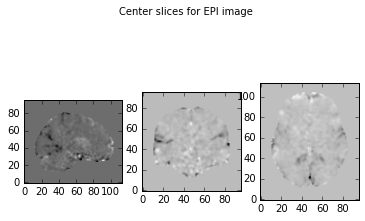

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")
slice_0 = img_data[40, :, :, 5]
slice_1 = img_data[:, 50, :, 5]
slice_2 = img_data[:, :, 40, 5]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")  

In [167]:
sphere_size = 3 #3 voxels in all directions
epicenter = [59, -56, 47]
all_voxels = []#list of lists, with each list being 3D coordinate in sphere
for i in range(0, sphere_size+1):
    for j in range(0, sphere_size+1):
         for k in range(0, sphere_size+1):
                new_voxel_sub = [epicenter[0]-i, epicenter[1]-j, epicenter[2]-k]
                new_voxel_add = [epicenter[0]+i, epicenter[1]+j, epicenter[2]+k]
                all_voxels.append(new_voxel_sub)
                all_voxels.append(new_voxel_add)

print(all_voxels)

[[59, -56, 47], [59, -56, 47], [59, -56, 46], [59, -56, 48], [59, -56, 45], [59, -56, 49], [59, -56, 44], [59, -56, 50], [59, -57, 47], [59, -55, 47], [59, -57, 46], [59, -55, 48], [59, -57, 45], [59, -55, 49], [59, -57, 44], [59, -55, 50], [59, -58, 47], [59, -54, 47], [59, -58, 46], [59, -54, 48], [59, -58, 45], [59, -54, 49], [59, -58, 44], [59, -54, 50], [59, -59, 47], [59, -53, 47], [59, -59, 46], [59, -53, 48], [59, -59, 45], [59, -53, 49], [59, -59, 44], [59, -53, 50], [58, -56, 47], [60, -56, 47], [58, -56, 46], [60, -56, 48], [58, -56, 45], [60, -56, 49], [58, -56, 44], [60, -56, 50], [58, -57, 47], [60, -55, 47], [58, -57, 46], [60, -55, 48], [58, -57, 45], [60, -55, 49], [58, -57, 44], [60, -55, 50], [58, -58, 47], [60, -54, 47], [58, -58, 46], [60, -54, 48], [58, -58, 45], [60, -54, 49], [58, -58, 44], [60, -54, 50], [58, -59, 47], [60, -53, 47], [58, -59, 46], [60, -53, 48], [58, -59, 45], [60, -53, 49], [58, -59, 44], [60, -53, 50], [57, -56, 47], [61, -56, 47], [57, -56,

In [188]:
import copy
import numpy as np
#averaging over every time point
avg_each_timepoint = []
for t in range(0, 600):
    all_voxels_copy = copy.deepcopy(all_voxels)
    [all_voxels_copy[voxel].append(t) for voxel in range(0, len(all_voxels_copy))]
    all_data = [img_data[one_voxel[0], one_voxel[1], one_voxel[2], one_voxel[3]] for one_voxel in all_voxels_copy]
    avg = np.average(all_data)
    avg_each_timepoint.append(avg)
    print("average at time " + str(t) + ": " + str(avg))
#print(avg_each_timepoint)

average at time 0: 0.107109
average at time 1: 0.0622041
average at time 2: 0.0143912
average at time 3: -0.0275228
average at time 4: -0.0556343
average at time 5: -0.0644681
average at time 6: -0.052082
average at time 7: -0.0204707
average at time 8: 0.0248218
average at time 9: 0.0757601
average at time 10: 0.123325
average at time 11: 0.159252
average at time 12: 0.177611
average at time 13: 0.175823
average at time 14: 0.155034
average at time 15: 0.11975
average at time 16: 0.0767537
average at time 17: 0.033618
average at time 18: -0.0028961
average at time 19: -0.028206
average at time 20: -0.0408091
average at time 21: -0.0424071
average at time 22: -0.0373663
average at time 23: -0.0315985
average at time 24: -0.0310448
average at time 25: -0.0401906
average at time 26: -0.0608848
average at time 27: -0.0917198
average at time 28: -0.128162
average at time 29: -0.16335
average at time 30: -0.189478
average at time 31: -0.199416
average at time 32: -0.188281
average at time 3

In [189]:
import nibabel as nib
img = nib.load('/Users/hellwalker/Desktop/scans/Morel_Mask_LPI_2mm.nii.gz')
img_data = img.get_data()
img_data.shape

(96, 114, 96)

0.0